# Scottish Gazeetter

The full Scottis Gazetter dataset has 21 directories (see bellow the list of directories) - one directory per book. 

All of these books correspond of the 11 collections of Scottish gazeeter. 

Each directory contains the information of each book and holds: 1) a metadata file (METS xml file per book) and 2) an ALTO subdirectory with all the pages (an ALTO xml file per page) of a the corresponding book: 

List of directories:
- 97343436: Gazetteer of Scotland - 1803 - Newman.326
- 97414570: Gazetteer of Scotland - 1806 - A.122.c
- 97421702: Gazetteer of Scotland - 1825? - R.237.i
- 97350713: Descriptive account of the principal towns in Scotland - 1828
- 97424370: Gazetteer of Scotland - 1838, Volume 1 - NF.1461.g.7
- 97430830: Gazetteer of Scotland - 1838, Volume 2 - NF.1461.g.7
- 97437554: Topographical, statistical, and historical gazetteer of Scotland - 1842, Volume 1  Map Room
- 97493971: Topographical, statistical, and historical gazetteer of Scotland - 1842, Volume 2  Map Room
- 97482042: Topographical dictionary of Scotland - 1846, Volume 1 - Map.Ref.C18
- 97361137: Topographical dictionary of Scotland - 1846, Volume 2 - Map.Ref.C18
- 97448598: Topographical, statistical, and historical gazetteer of Scotland - 1848, Volume 2 - Map Room
- 97459138: Imperial gazeteer of Scotland, or, Dictionary of Scottish topography - 1868, Volume 1
- 97470686: Imperial gazeteer of Scotland, or, Dictionary of Scottish topography - 1868, Volume 2
- 97355229: Gazetteer of Scotland - 1882 - Map.Ref.C18
- 97368774: Ordnance gazetteer of Scotland - 1884-1885, Volume 1 - Map.Ref.C18
- 97372786: Ordnance gazetteer of Scotland - 1884-1885, Volume 2 - Map.Ref.C18
- 97376462: Ordnance gazetteer of Scotland - 1884-1885, Volume 3 - Map.Ref.C18
- 97380354: Ordnance gazetteer of Scotland - 1884-1885, Volume 4 - Map.Ref.C18
- 97383958: Ordnance gazetteer of Scotland - 1884-1885, Volume 5 - Map.Ref.C18
- 97387610: Ordnance gazetteer of Scotland - 1884-1885, Volume 6 - Map.Ref.C18
- 97393254: Ordnance gazetteer of Scotland - 1901 - Map.Ref.C18

List of collections:
- Gazetteer of Scotland - 1803:
    - 1 Volume
- Gazetteer of Scotland - 1806
    - 1 Volume
- Gazetteer of Scotland - 1825
    - 1 Volume
- Descriptive account of the principal towns in Scotland - 1828
    - 1 Volume
- Gazetteer of Scotland - 1838
    - 2 Volumes
- Topographical, statistical, and historical gazetteer of Scotland - 1842
    - 2 Volumes
- Topographical dictionary of Scotland - 1846
    - 2 Volumes
- Topographical, statistical, and historical gazetteer of Scotland - 1848
    - Only Volume 2 (?)
- Imperial gazeteer of Scotland, or, Dictionary of Scottish topography - 1868
    - 2 Volumes
- Gazetteer of Scotland - 1882 
    - 1 Volume
- Ordnance gazetteer of Scotland - 1884-1885
    - 7 Volumes

 

### Loading the necessary libraries

In [1]:
import yaml
from IPython.core.display import display, HTML
import pandas as pd 
import matplotlib.pyplot as plt
import numpy as np

### Functions

In [2]:
def read_query_results(filename):
    with open('./results_Gazetteer/'+filename, 'r') as f:
        query_results = yaml.load(f)
    return query_results


In [3]:
def plot_norm(publication, element):
    plt.figure(figsize=(18,6))
    num_element={}
    years=set()
    for year in publication:
        if element == "words":
            num_element[year]=publication[year][2]
        elif element == "pages":
            num_element[year]=publication[year][1]
        else:
            num_element[year]=publication[year][0]
        years.add(year)  
    plt.plot(*zip(*sorted(num_element.items())), label=element, lw = 2, alpha = 1, marker="X")
    plt.xticks(sorted(list(years)), rotation=50) 
    plt.ticklabel_format(style = 'plain')
    plt.legend(loc='upper right')
    plt.ylabel('Number of ' + element + 'per volumne')
    plt.xlabel("Years")
    plt.show()
    return num_element, years

In [4]:
# Plot two lines with different scales on the same plot
def cumulative_plot(element1, element2, num_element1, num_element2, years):
    fig = plt.figure(figsize=(12, 6))
    line_weight = 3
    alpha = .5
    ax1 = fig.add_axes([0, 0, 1, 1])
    ax1.set_xticks(sorted(list(years))) 
    ax2 = fig.add_axes()# This is the magic that joins the x-axis
    ax2 = ax1.twinx()
    lns1 = ax1.plot(*zip(*sorted(num_element1.items())), color='blue', lw=line_weight, alpha=alpha, label=element1, marker='d')
    lns2 = ax2.plot(*zip(*sorted(num_element2.items())), color='orange', lw=line_weight, alpha=alpha, label=element2, marker='s')
    leg = lns1 + lns2
    labs = [l.get_label() for l in leg]
    ax1.legend(leg, labs, loc=0)
    plt.setp(ax1.xaxis.get_majorticklabels(), rotation=50 )
    plt.title('Cumulative yearly '+ element1 +' & '+ element2)  
    plt.show()

## 1. Normalised Query

First we need to run the normalised query, to know how many documents, pages and words we have per year of eddition. 

* spark-submit --py-files defoe.zip defoe/run_query.py nls-gazetteersOfScotland.txt nls defoe.nls.queries.normalize -r results_norm_gaz -n 16


Note: nls-gazetteersOfScotland.txt contains the path of all downloaded dataset:
        
        XXXX/nls-data-gazetteersOfScotland/97350713
        XXXX/nls-data-gazetteersOfScotland/97355229
        XXXX/nls-data-gazetteersOfScotland/97361137
        XXXX/nls-data-gazetteersOfScotland/97368774
        XXXX/nls-data-gazetteersOfScotland/97372786
        XXXX/nls-data-gazetteersOfScotland/97376462
        XXXX/nls-data-gazetteersOfScotland/97380354
        XXXX/nls-data-gazetteersOfScotland/97383958
        XXXX/nls-data-gazetteersOfScotland/97387610
        XXXX/nls-data-gazetteersOfScotland/97393254
        XXXX/nls-data-gazetteersOfScotland/97414570
        XXXX/nls-data-gazetteersOfScotland/97421702
        XXXX/nls-data-gazetteersOfScotland/97424370
        XXXX/nls-data-gazetteersOfScotland/97430830
        XXXX/nls-data-gazetteersOfScotland/97437554
        XXXX/nls-data-gazetteersOfScotland/97448598
        XXXX/nls-data-gazetteersOfScotland/97459138
        XXXX/nls-data-gazetteersOfScotland/97470686
        XXXX/nls-data-gazetteersOfScotland/97482042
        XXXX/nls-data-gazetteersOfScotland/97493971


And now we are going to examine the results of the normalization query to see the total number of documents, pages and words published over the years.

The query return the results in this format:

    {
      <YEAR>: [<NUM_BOOKS>, <NUM_PAGES>, <NUM_WORDS>],
      ...
    }

In [5]:
norm_publication=read_query_results('results_norm_gaz')
sorted(norm_publication.items())

[(1806, [1, 594, 426808]),
 (1825, [1, 222, 182032]),
 (1828, [1, 376, 83346]),
 (1838, [2, 1098, 865559]),
 (1842, [2, 1798, 2221435]),
 (1846, [2, 1302, 1520380]),
 (1848, [1, 878, 1093503]),
 (1868, [2, 1908, 2181484]),
 (1882, [1, 492, 389159]),
 (1883, [6, 2038, 2516567]),
 (1901, [1, 1776, 2481536])]

In order to set the scene and visualize how the books/documents, pages and words grew over the time, we are going to plot three basic graphs:        
- number of books over time per year
- number of pages over time per year
- number of words over time per year

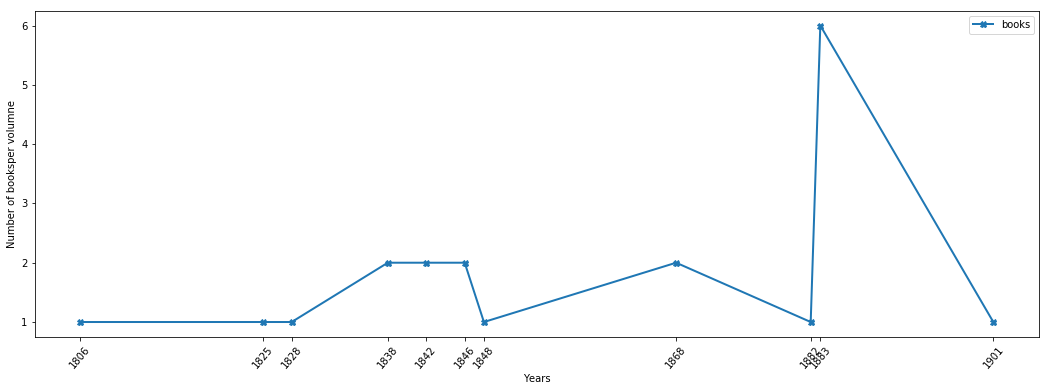

In [6]:
#Plot the variation of number of documents per volumme 
num_books, doc_years = plot_norm(norm_publication, "books")

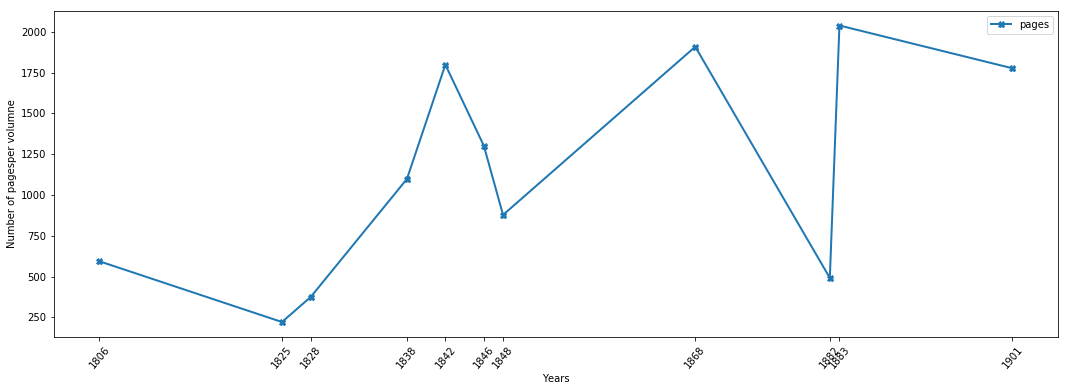

In [7]:
#Plot the variation of number of pages per volumme 
num_pages, pages_years = plot_norm(norm_publication, "pages")

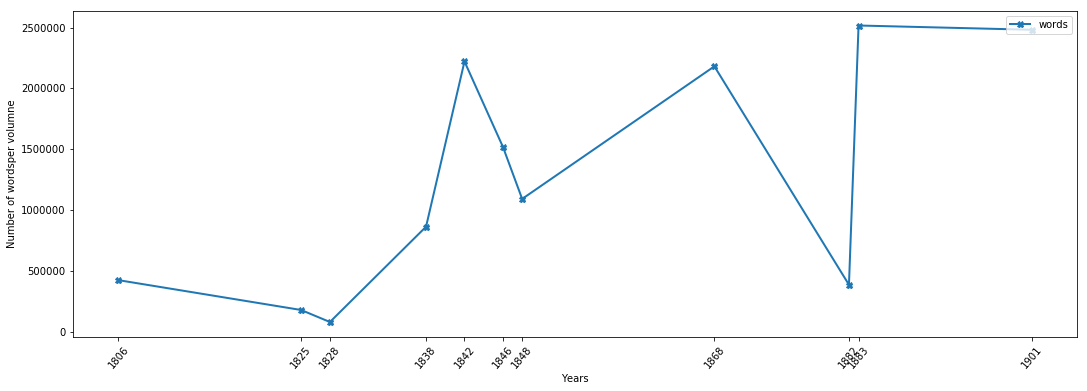

In [8]:
#Plot the variation of number of words per volumme 
num_words, words_years = plot_norm(norm_publication, "words")

And now we are going to visualize in the same figure the previous frequencies [books| pages| words], by ploting two frequencies together each time. Notice that each frequency has a different scale


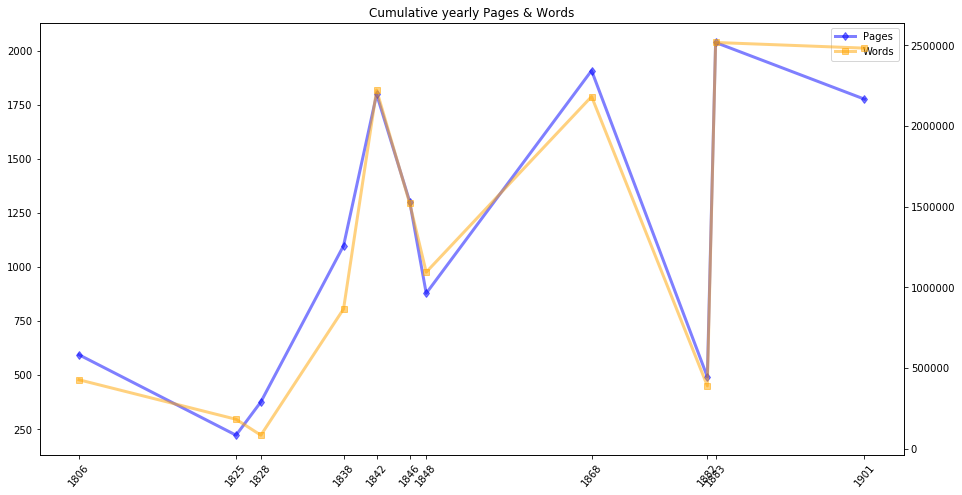

In [9]:
# Plot Pages and Words frequencies with different scales on the same plot
cumulative_plot("Pages", "Words", num_pages, num_words, words_years)

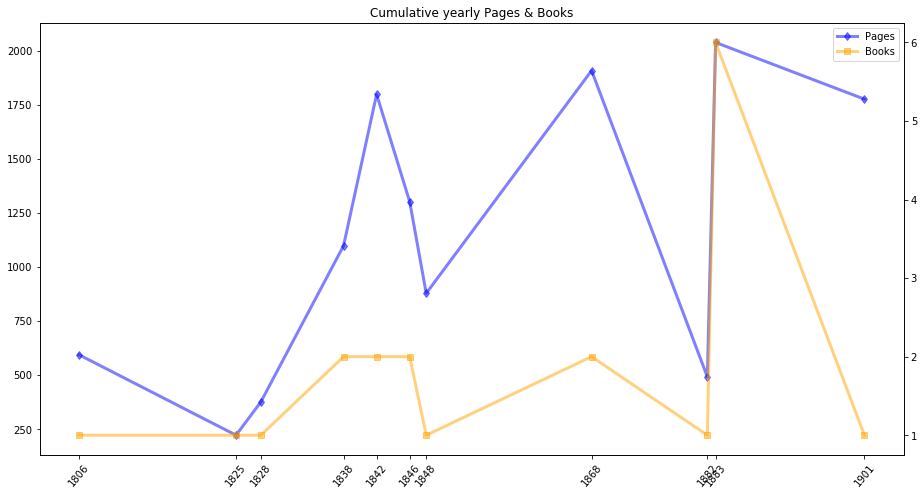

In [10]:
# Plot Pages and Documents frequencies with different scales on the same plot
cumulative_plot("Pages", "Books", num_pages, num_books, doc_years)

## 2. Exploring in which years were pubished each editions

We have noticed that an eddition could be published across years (including suplements). For that reason, we have run a query, called inventory_per_year, which aggregates per year the the title and ediditon of each document.

( Query: spark-submit --py-files defoe.zip defoe/run_query.py nls-gazetteersOfScotland.txt nls defoe.nls.queries.inventory_per_year -r results_inventory_per_year -n 324 )

The results of this query can be found at this repository: results_Gazetteer/results_inventory_per_year

Now, we are going to calculate for each of the eight edditions, the years in which were published.


In [11]:
inventory_results=read_query_results('results_inventory_per_year')
for year_inv in inventory_results:
    print ("Year: %s - Title: %s" %(year_inv, inventory_results[year_inv][0][0]))
    for publication in inventory_results[year_inv]: 
        print(" ---> Edition: %s" %publication[1])

Year: 1825 - Title: Gazetteer of Scotland; arranged under the various descriptions of counties, parishes, islands
 ---> Edition: 1825?
Year: 1828 - Title: Descriptive account of the principal towns in Scotland: to accompany Wood's town atlas
 ---> Edition: 1828
Year: 1868 - Title: imperial gazetteer of Scotland; or, Dictionary of Scottish topography, compiled from the most recent authorities, and forming a complete body of Scottish geography, physical, statistical, and historical
 ---> Edition: 1868, Volume 1
 ---> Edition: 1868, Volume 2
Year: 1901 - Title: Ordnance gazetteer of Scotland
 ---> Edition: 1901
Year: 1806 - Title: gazetteer of Scotland: containing a particular and concise description of the counties, parishes, islands, cities ... With ... map
 ---> Edition: 1806
Year: 1842 - Title: topographical, statistical, and historical gazetteer of Scotland
 ---> Edition: 1842, Volume 1
 ---> Edition: 1842, Volume 2
Year: 1838 - Title: gazetteer of Scotland. [With plates and maps.]
 

## 3. Geoparsing the Scottiesh Gazetter : 

### 3.1 Descriptive account of the principal towns in Scotland - 1828

We run the *georesolution_pages* defoe query:

 spark-submit --py-files defoe.zip defoe/run_query.py nls-gaz-demo.txt nls defoe.nls.queries.georesolution_pages -r georesolution_97350713 -n 16
 
Note: We just perfomed this study using all the pages of one book. Therefore, the *nlz-gaz-demo.txt* only has one directory: XXXX/nls-data-gazetteersOfScotland/97350713. But we could run this query using the full dataset (which will include all the directories).
 
This query does the following tasks:

- Ingests all the pages from the directory "97350713",  which corresponds to the book "Descriptive account of the principal towns in Scotland - 1828"
- Cleans the text applied two fixes: Long-s and hyphen words
- Identifies *entities* running spacy over the cleaned text
- From the previous entities, just selects the one about *location* (GPE, LOC) and creates an xml (in memory) per page with these "location" entities. 
- Applies the georesolve (from the Edinburgh Geoparser) to each xml and gets lat and long. 
- Group the results by Book's title, and also gets some informative metadata

As a result we get a file per gazetter|book with an entry per page with the following information:

    * archive_filename: Path to the gazetteer 
    * clean_text: Page's clean text after applying 2 fixes: long-S and hyphenate words
    * display_doc: Display of a page’s entities found by SpaCy (in HTML format)
    * edition: Edition of the gazetteer
    * georesolution_page: Page's geolocations after applying the georesolver to the page’s  locations (GPE|LOC) found by SpaCy
    * model: defoe model – could be fmp|nls|papers|alto. In this case is “nls”
    * text_unit: page (for other defoe models could be “article”)
    * num_text_unit: number of tex units. In this case, number of pages of this particular gazetter (e.g. 376)
    * page_filename: Page's filename (page's relative path)
    * text_unit_id: The number of this page (e.g. Page 1)
    * type_distribution: type of document (newspaper|book). In this case is "book". 
    * year: Gazetter's year 


Example:

    - "Descriptive account of the principal towns in Scotland: to accompany Wood''s town atlas':
        - archive_filename: /home/tdm/datasets/nls-data-gazetteersOfScotland/97350713
          clean_text: "Xll Greenock, 171 Haddington, 181 Hamilton, ..."
          display_doc: "<div class=\"entities\" ... </div>"
          edition: '1828'
          georesolution_page:
            Hamilton-1:
                - '55.77731433348086'
                - '-4.067392672500774'
            Inverary-2:
                - '56.2333333'
                - '-5.0666667'
            Inverness-3:
                - '57.47871409771949'
                - '-4.212450527351024'
            Lanark-4:
                - '55.67483195471274'
                - '-3.775417694605498'
          model: nls
          num_text_unit: 376
          page_filename: alto/97350923.34.xml
          place: Edinburgh
          text_unit: page
          text_unit id: Page18
          type_distribution: book
          year: 1828


In [12]:
result=read_query_results('georesolution_97350713')

In [13]:
for i in result.keys():
    for k in result[i]:
        html= k["display_doc"]
        if html:
            print(" ----- New Page with Entities detected by SpaCy ----- \n")
            display(HTML(html))
         

 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



 ----- New Page with Entities detected by SpaCy ----- 



In [14]:
dfs=[]
data=[]
c_locs=[]
for i in result.keys():
    t_ind = 0
    e_ind = 0
    for k in result[i]:
        locs= k["georesolution_page"]
        page = k["text_unit id"]
       
        if locs != {}:
            data=[]
            l_ind = 0
            for i in locs:
                if type(locs[i]) == type([]) :
                    c_locs=locs[i].copy()
                    c_locs.append(i.split("-")[0])
                    c_locs.append(page)
                    data.append(c_locs)
                    l_ind = l_ind + 1   
            e_ind = t_ind + l_ind 
            if data:
               df_page = pd.DataFrame(data, columns = ['Latitude', 'Longitude', 'Place', 'Page'], 
                                      index=list(range(t_ind, e_ind)))
               dfs.append(df_page)
               t_ind=e_ind
               

In [15]:
df_total = pd.concat(dfs)
df_total

Latitude            Longitude           Place     Page
0           50.333333655        -57.531547279           Bound    Page7
1      57.68633318560074    -4.96890721218449        Scotland    Page9
2      63.08985016483783   -113.2169083324163          Gordon   Page13
3      56.14619703287505   -3.216735886949388           Cluny   Page14
4             55.6166667           -3.4166667       Broughton   Page14
5      56.47018024186861    -3.16215196256474         Hillton   Page14
6      55.77731433348086   -4.067392672500774        Hamilton   Page18
7             56.2333333           -5.0666667        Inverary   Page18
8      57.47871409771949   -4.212450527351024       Inverness   Page18
9      55.67483195471274   -3.775417694605498          Lanark   Page18
10     51.46269887944979  0.04732822032113404       Greenwich   Page23
11            42.7737033          -70.8411626        Old Town   Page23
12            42.7737033          -70.8411626             Old   Page23
13      52.1412992458346   0.6363058597995664      Gallowgate   Page24
14     57.15956045188484   -2.134722052407824        Aberdeen   Page25
15     57.15956045188484   -2.134722052407824        Aberdeen   Page25
16     57.68633318560074    -4.96890721218449        Scotland   Page25
17     57.15956045188484   -2.134722052407824        Aberdeen   Page27
18     57.15956045188484   -2.134722052407824        Aberdeen   Page27
19      55.9251525946208   -3.284768133955424       Edinburgh   Page27
20     57.68633318560074    -4.96890721218449        Scotland   Page27
21     57.15956045188484   -2.134722052407824        Aberdeen   Page28
22      57.1673146280548   -2.092580471298619    Old Aberdeen   Page28
23     57.15956045188484   -2.134722052407824        Aberdeen   Page28
24             35.095046         -106.6708594    the Old Town   Page28
25     57.15956045188484   -2.134722052407824        Aberdeen   Page29
26     57.15956045188484   -2.134722052407824        Aberdeen   Page29
27     57.15956045188484   -2.134722052407824        Aberdeen   Page29
28            44.6436613   -72.83068350000001    the Old Town   Page30
29     57.68633318560074    -4.96890721218449        Scotland   Page30
...                  ...                  ...             ...      ...
1094            51.59468             -1.12829  the south east  Page361
1095   57.15956045188484   -2.134722052407824        Aberdeen  Page361
1096    55.9251525946208   -3.284768133955424       Edinburgh  Page361
1097   56.86975802114635   -2.534745750336879      Kincardine  Page361
1098   56.42282247580768    -3.47920071045354           Perth  Page361
1099   56.70832370552517   -2.467117965467635        Montrose  Page361
1100   56.96590381553843    -2.21754202999286      Stonehaven  Page362
1101          41.5289871          -72.0786883            Jail  Page362
1102            40.43579   -79.99572999999999     Magistrates  Page363
1103   57.68633318560074    -4.96890721218449        Scotland  Page363
1104   57.15956045188484   -2.134722052407824        Aberdeen  Page363
1105           39.521218          -76.4271849      Strathmore  Page363
1106          16.8333333   -88.33333330000001         Regalia  Page364
1107          17.5666667          -88.5166667        Scotland  Page364
1108        44.816803279   -79.86636222600001       Candlemas  Page365
1109   57.33597195059147   -2.500225160021933            Urie  Page365
1110       -43.968337882        171.870109343       Stornaway  Page367
1111   45.26764557499408   -79.08598792226002            Bays  Page368
1112   53.69180622064813   -2.423529257645026        Scotland  Page368
1113        50.599615774       -126.686364102         Harbour  Page369
1114   58.24568165804411   -6.270516819262197       Broad Bay  Page369
1115           47.080374         -122.8459707       South Bay  Page369
1116              47.438            -122.2958       sea coast  Page369
1117   59.40066396751885    10.75089969243535            moss  Page369
1118       -43.968337882        171.8701

In [16]:
df_total[["Place"]].count()

Place    1124
dtype: int64

In [17]:
df_total.sum()

Latitude     50.33333365557.6863331856007463.08985016483783...
Longitude    -57.531547279-4.96890721218449-113.21690833241...
Place        BoundScotlandGordonClunyBroughtonHilltonHamilt...
Page         Page7Page9Page13Page14Page14Page14Page18Page18...
dtype: object

In [18]:
df_total.groupby("Place").count()

Latitude  Longitude  Page
Place                                                            
Aberdeen                                      24         24    24
Agnes                                          1          1     1
Aikman                                         1          1     1
Albany                                         3          3     3
Alnwick                                        1          1     1
America                                        8          8     8
Angus                                          3          3     3
Anstruther                                     1          1     1
Apparatus                                      1          1     1
Arbroath                                       2          2     2
Arran                                          5          5     5
Athol                                          1          1     1
Atlantic                                       2          2     2
Ayr                                            4          4     4
Ayrshire                                       1          1     1
Bailie                                         1          1     1
Balls                                          1          1     1
Baltic                                         1          1     1
Banff                                          1          1     1
Banffshire                                     1          1     1
Barony                                         4          4     4
Barracks                                       1          1     1
Basin                                          1          1     1
Baths                                          1          1     1
Bay                                            4          4     4
Bays                                           1          1     1
Beechwood                                      1          1     1
Bel mount                                      1          1     1
Belfast                                        1          1     1
Bervie                                         1          1     1
...                                          ...        ...   ...
Williamsburgh                                  1          1     1
Wooden                                         1          1     1
Wool                                           1          1     1
Writing                                        1          1     1
Yarrow                                         1          1     1
Yeomanry                                       1          1     1
dale                                           1          1     1
earth                                          1          1     1
east                                           5          5     5
hemp                                           1          1     1
hill                                           1          1     1
lichen                                         1          1     1
moss                                           1          1     1
north                                          2          2     2
north east                                     2          2     2
picturesque                                    1          1     1
sea coast                                      1          1     1
south                                          7          7     7
south east                                     1          1     1
the County Rooms,                              1          1     1
the County Rooms, Sheriff Court Rooms,         1          1     1
the Isle of Wight                              1          1     1
the Old Jail                                   1          1     1
the Old Town                                   3          3     3
the West Indies                                2          2     2
the east end                                   2          2     2
the south east                                 2          2     2
the west end                                   3          3     3
valley        

In [19]:
df_total.groupby("Page").count()

Latitude  Longitude  Place
Page                               
Page100         3          3      3
Page101         3          3      3
Page102         5          5      5
Page105         6          6      6
Page108         6          6      6
Page110         1          1      1
Page111         6          6      6
Page112         3          3      3
Page113         2          2      2
Page114         4          4      4
Page115         1          1      1
Page116         4          4      4
Page117         5          5      5
Page119         5          5      5
Page121         1          1      1
Page122         3          3      3
Page124         3          3      3
Page128         2          2      2
Page129         1          1      1
Page13          1          1      1
Page130         2          2      2
Page133        10         10     10
Page134         3          3      3
Page135         9          9      9
Page136         4          4      4
Page138         4          4      4
Page139         5          5      5
Page14          3          3      3
Page140         1          1      1
Page141        11         11     11
...           ...        ...    ...
Page68          9          9      9
Page69          1          1      1
Page7           1          1      1
Page70         13         13     13
Page71          7          7      7
Page72         11         11     11
Page73          3          3      3
Page75          7          7      7
Page76          5          5      5
Page77          2          2      2
Page79          2          2      2
Page80          1          1      1
Page81          1          1      1
Page82          5          5      5
Page83          1          1      1
Page84          2          2      2
Page85          7          7      7
Page86          4          4      4
Page87          1          1      1
Page88          2          2      2
Page89          1          1      1
Page9           1          1      1
Page90          2          2      2
Page91          1          1      1
Page92          8          8      8
Page94          3          3      3
Page96          6          6      6
Page97          3          3      3
Page98          3          3      3
Page99          4          4      4

[287 rows x 3 columns]